# Process Dynamics and Control
## Chapter 4 Exercises:

## Exercise 4.1
Consider a transfer function:


$$G = \frac{Y(s)}{U(s)} = \frac{d}{bs+c}$$


 **(a)** What is the steady-state gain?

 **(b)** For a step change of magnitude M in the input, will the output response be bounded for all values of constants b,c and d? Briefly justify your answer.

## Answer


#### (a)

We can get the steady-state gain by making $s \to 0$. Therefore, we get:


$$K = \frac{d}{c}$$

We can also place the transfer function in the gain/time constant form


$$G = \frac{Y(s)}{U(s)}=\frac{K}{\tau s + 1}$$


Where:

$K = \frac{d}{c}$

$\tau = \frac{b}{c}$

#### (b)

To find if the response will be bounded for all values of constants in the transfer function it's easier to calculate the analytical response for a step input. We can do that using the SymPy library.

In [195]:
from sympy.integrals import laplace_transform
from sympy import Symbol
from sympy import plot
from sympy.integrals import inverse_laplace_transform
from sympy import symbols

In [201]:
# Creating the symbols to use in the Transfer Function and in the input
s = Symbol('s')
t = Symbol('t',positive=True)
d = Symbol('d',real=True)
b = Symbol('b',real=True)
c = Symbol('c',real=True)
M = Symbol("M",real=True)

In [208]:
# Creating Transfer Function, Input Function and Response Function.
G = d/(b*s+c)
U = M/s
Y = G*U 
y = inverse_laplace_transform(Y,s,t)
y

M*d/c - M*d*exp(-c*t/b)/c

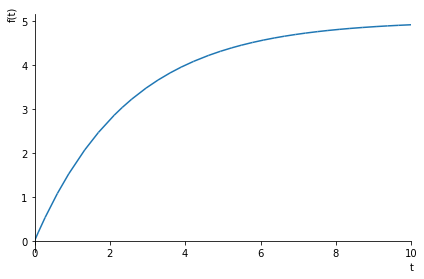

In [24]:
# Plot for response with a=2 b=10 c=4 M=10
plot(y.subs({a:2,b:10,c:4,M:10}),xlim=[0,10]);

The $\theta (t)$ in the inverse laplace result is the Heaviside function, which is 1 if t>0, therefore we can think of it as being equal to 1. If we rearrange the terms of the inverse laplace we get:


$$y(t) = MK\left[1-exp \left (\frac{-t}{\tau} \right )\right]$$


Therefore, the response for a step input will be bounded if $\tau>0$ which means $\frac{b}{c}>0$.

## Exercise 4.2


$$G(s) = \frac{3e^{-s}}{10s+1}$$


**(a)** What is the steady-state gain?


**(b)** What is the time constant?


**(c)** If $U(s) = 4/s$, what is the value of the output y(t) when $t \to \infty$


**(d)** For the same $U(s)$, what is the value of the output when $t=10$? What is the output when expressed as a fraction of the new steady-state?


**(e)** If $U(s) = \left (1-e^{-s}\right)/s$, that is, the unit rectangular pulse, what is the output when $t \to \infty$


**(f)** If $u(t) = \delta (t)$, that is, the unit impulse at $t=0$, what is the output when $t \to \infty$


**(g)** If $u(t) = 5sin(2t)$,what is the value of the output when $t \to \infty$?

## Answer

#### (a)

$K = 5$


#### (b)


$\tau = 10$





In [47]:
from sympy.integrals import laplace_transform
from sympy import Symbol
from sympy import plot
from sympy.integrals import inverse_laplace_transform
import matplotlib.pyplot as plt

#### (c) and (d)

For question **(c)** we can get the answer using  the Final Value Theorem  $y( \infty ) = \lim_{s\to0}[sY(s)] $, which yields:


$$Y(s) = \frac{3e^{-s}}{10s+1}\frac{4}{s}$$


$$sY(s) = \frac{12e^{-s}}{10s+1}$$


$$\lim_{s\to0} \frac{12e^{-s}}{10s+1} = 12$$


For **(d)** we can do the inverse laplace of Y(s) and use t=10

In [30]:
# Creating symbols used to do the Laplace transformations.
s = Symbol('s')
t = Symbol('t')

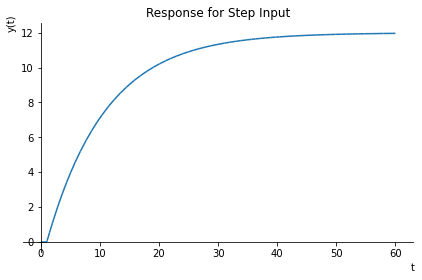

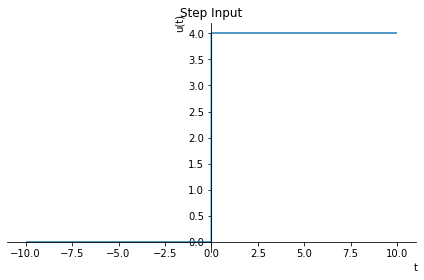

In [116]:
from sympy import exp
# Creating Transfer Function
G = (3*exp(-s))/(10*s+1)
# Creating Input Response
U1 = 4/s
# Getting the response in the time domain
y1 = inverse_laplace_transform(U1*G,s,t)
# Plotting the time domain response for the step input for t from 0 to 40
plot(y1,(t,0,60),ylabel="y(t)",title="Response for Step Input");
# Plotting the step change in the input.
plot(inverse_laplace_transform(U1,s,t),ylabel="u(t)",title="Step Input");

We can clearly see from the plot above that the reponse reaches the steady-state at $y(t\to\infty = 10$. We can also see that $y(t=10=\tau) \approx 7.12$ approximately 0.6 of the steady-state value of y. It's also possible to use the analytical response of y, obtained by the inverse laplace, to evaluate more accurately the value of $y(t=10)$. To do that we can use the N function from SymPy library.

In [118]:
from sympy import N
# Using subs to substitute the values of t for 10
# Using N() function to pass the equation with the substitute values to get the final answer
print("y(t=10) = "+str(round(N(y1.subs({t:10})),2)))
print("y(t=10)/12 = " + str(round(N(y1.subs({t:10})),2)/12))

y(t=10) = 7.12
y(t=10)/12 = 0.593


#### (e)

We can use the Final Value Theorem again or plot the inverse laplace to check $y(t\to\infty)$

In [122]:
U2 = (1-exp(-s))/s
y2 = inverse_laplace_transform(G*U2,s,t)

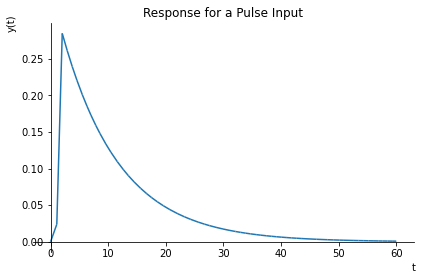

In [124]:
plot(y2,(t,0,60),ylabel="y(t)",title="Response for a Pulse Input");

We can see that $y(t\to\infty) = 0$

#### (f)

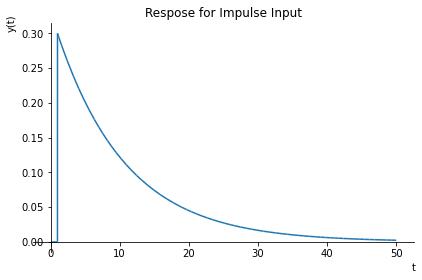

In [150]:
# Dirac Delta Laplace Transform
U3 = 1
Y3 = G*U3
y3 = inverse_laplace_transform(Y3,s,t)
plot(y3,(t,0,50),ylabel="y(t)",title="Respose for Impulse Input");

#### (g)

In [127]:
from sympy import sin
u4 = 5*sin(2*t)
U4 = laplace_transform(u4,t,s,noconds=True)
Y4 = U4*G
y4 = inverse_laplace_transform(Y4,s,t)

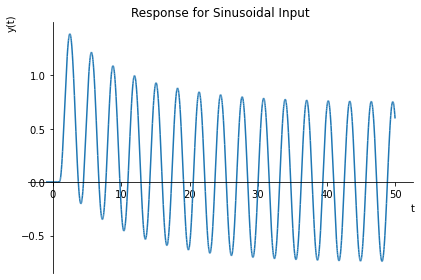

In [128]:
plot(y4,(t,-1,50),ylabel="y(t)",title="Response for Sinusoidal Input");

## Exercise 4.3

The dynamic behavior of a pressure sensor/transmitter
can be expressed as a first-order transfer function (in deviation
variables) that relates the measured value Pm to the actual
pressure, P:


$$\frac{P'_m(s)}{P'(s)} = \frac{1}{30s+1}$$


Both $P_m$ and $P$ have units of psi and the time constant
has units of seconds. Suppose that an alarm will sound if
$P_m$ exceeds 45 psi. If the process is initially at steady state
($\bar{P_m} = \bar{P} = 35 psi$), and then P suddenly changes from 35 to
50 psi at 1:30 PM, at what time will the alarm sound?

## Answer


At 1:30 PM we'll have a step of magnitude 15 in the actual pressure and since we have the transfer function relating both the actual and the measured pressure we can calculate the response of the measured pressure for a step change in P. With the response we can find the value of t that will yield $P'_m = 10$ or $P_m = 45$


- $P'_m(s) = P_m - 35$
- $P'(s) = P - 35$



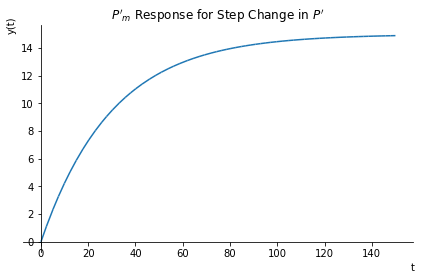

In [185]:
from sympy import solve
I = 15/s
G = 1/(30*s+1)
Y = I*G
y = inverse_laplace_transform(Y,s,t)
plot(y,(t,0,150),ylabel="y(t)",title="$P'_m$ Response for Step Change in $P'$");

In [182]:
t_alarm = N(solve(y-10,t)[0])
print("The alarm will sound {:.2f} seconds after 1:30 PM".format(t_alarm))

The alarm will sound 32.96 seconds after 1:30 PM
